# Exploring complex numbers in Python

Prior art: [Visualizing the Mandelbrot Set Using Python (< 50 Lines)](https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f).


https://en.wikipedia.org/wiki/Mandelbrot_set

YouTube blogs?

## Initial Concepts and Python support

Before diving into the Mandelbrot set we explore some initial concepts and
python support.

* complex numbers
* recursive functions (in math sense) -- its domain is its range
* generators
* orbits
* bounded regions

* [complex numbers](https://realpython.com/python-complex-numbers/)
* [generators](https://realpython.com/introduction-to-python-generators/)

definition of set
refresher on complex numbers? Nah, just point to wikipedia or 3b2b
orbits generators

## Modeling orbits: a simple case

Use a generator function to model the orbit of $c$ around $1$ for the recursive expression $z_{n+1} = {z_n}c$.

In [2]:
def orbit(c:complex):  # <- parameter
    z=1                # <- origin
    while True:
        z=z*c          # <- recursive expression
        yield z

We can repeatedly call the `next` function on the instantiated generator to `yield` the orbit values. 

In [3]:
def orbit_values(c:complex, steps:int=10):
    o = orbit(c)
    index = range(steps)  # <- an index into the sequence of steps
    return [next(o) for _ in index]

*So, what do the orbits for this recursive expression look like?*

We'll starting out "painfully" simple to give ourselves a good grounding and to develop the right tools and intuitions for when things get really interesting.

Lets start our exploration by looking at real values for $c$. 

### Real Values: $c \in \mathbb{R}$

The following subsets (or regions) on the real line display different behabiours:

* Identities: 0 and 1
* Positive values > 1
* Positive values < 0
* Negative "identity": -1
* Negative values < -1
* Negative values > -1

#### Identities: $0$ and $1$

In [3]:
orbit_values(c=0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [4]:
orbit_values(c=1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

No surpirses here, but we can note that both orbits are very *stable*. 

However, $c=1$ is the start of something interesting.

#### Positive values $> 1$

In [5]:
orbit_values(c=1.1)

[1.1,
 1.2100000000000002,
 1.3310000000000004,
 1.4641000000000006,
 1.6105100000000008,
 1.771561000000001,
 1.9487171000000014,
 2.1435888100000016,
 2.357947691000002,
 2.5937424601000023]

In [6]:
orbit_values(1.5)

[1.5,
 2.25,
 3.375,
 5.0625,
 7.59375,
 11.390625,
 17.0859375,
 25.62890625,
 38.443359375,
 57.6650390625]

In [7]:
orbit_values(2)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [8]:
orbit_values(4)

[4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144, 1048576]

For these values the orbits appear to *diverge* at an increasing rate.

#### Positive values $< 1$ 

In [4]:
orbit_values(0.8)

[0.8,
 0.6400000000000001,
 0.5120000000000001,
 0.40960000000000013,
 0.32768000000000014,
 0.2621440000000001,
 0.2097152000000001,
 0.1677721600000001,
 0.13421772800000006,
 0.10737418240000006]

In [5]:
orbit_values(0.4)

[0.4,
 0.16000000000000003,
 0.06400000000000002,
 0.025600000000000008,
 0.010240000000000004,
 0.0040960000000000015,
 0.0016384000000000008,
 0.0006553600000000003,
 0.0002621440000000001,
 0.00010485760000000006]

In [6]:
orbit_values(0.2)

[0.2,
 0.04000000000000001,
 0.008000000000000002,
 0.0016000000000000005,
 0.00032000000000000013,
 6.400000000000002e-05,
 1.2800000000000006e-05,
 2.5600000000000013e-06,
 5.120000000000002e-07,
 1.0240000000000006e-07]

In [7]:
orbit_values(0.1)

[0.1,
 0.010000000000000002,
 0.0010000000000000002,
 0.00010000000000000003,
 1.0000000000000004e-05,
 1.0000000000000004e-06,
 1.0000000000000005e-07,
 1.0000000000000005e-08,
 1.0000000000000005e-09,
 1.0000000000000006e-10]

With $0<c<1$, we get orbits that *converge* to $0$ at an increaseing rate.

#### Negative "identity": $-1$

In [12]:
orbit_values(-1)

[-1, 1, -1, 1, -1, 1, -1, 1, -1, 1]

Here we get an oscillation or _cycle_ between $1$ and $-1$.

#### Negative values $>-1$

In [13]:
orbit_values(-0.8)

[-0.8,
 0.6400000000000001,
 -0.5120000000000001,
 0.40960000000000013,
 -0.32768000000000014,
 0.2621440000000001,
 -0.2097152000000001,
 0.1677721600000001,
 -0.13421772800000006,
 0.10737418240000006]

In [14]:
orbit_values(-0.5)

[-0.5,
 0.25,
 -0.125,
 0.0625,
 -0.03125,
 0.015625,
 -0.0078125,
 0.00390625,
 -0.001953125,
 0.0009765625]

In [15]:
orbit_values(-0.1)

[-0.1,
 0.010000000000000002,
 -0.0010000000000000002,
 0.00010000000000000003,
 -1.0000000000000004e-05,
 1.0000000000000004e-06,
 -1.0000000000000005e-07,
 1.0000000000000005e-08,
 -1.0000000000000005e-09,
 1.0000000000000006e-10]

#### Negative values $< -1$ 

In [16]:
orbit_values(-1.1)

[-1.1,
 1.2100000000000002,
 -1.3310000000000004,
 1.4641000000000006,
 -1.6105100000000008,
 1.771561000000001,
 -1.9487171000000014,
 2.1435888100000016,
 -2.357947691000002,
 2.5937424601000023]

### Example 4.6

In [17]:
orbit_values(-1.5)

[-1.5,
 2.25,
 -3.375,
 5.0625,
 -7.59375,
 11.390625,
 -17.0859375,
 25.62890625,
 -38.443359375,
 57.6650390625]

### Example 4.7

In [18]:
orbit_values(-2)

[-2, 4, -8, 16, -32, 64, -128, 256, -512, 1024]

### Example 4.8

In [19]:
orbit_values(-4)

[-4, 16, -64, 256, -1024, 4096, -16384, 65536, -262144, 1048576]

Here we see similar behaviour, but with an *oscillation* between positive and negative values.

[Example 4.1](http://localhost:8888/notebooks/mandelbrot.ipynb#Example-4.1) 
is special in that the oscilation is *stable* like 
[Example 1.2](http://localhost:8888/notebooks/mandelbrot.ipynb#Example-1.2).

*What about pure imaginary values?*

### Example 5.1

In [20]:
orbit_values(1j)

[1j, (-1+0j), (-0-1j), (1-0j), 1j, (-1+0j), (-0-1j), (1-0j), 1j, (-1+0j)]

### Example 5.2

In [21]:
orbit_values(-1j)

[-1j, (-1+0j), 1j, (1-0j), (-0-1j), (-1+0j), 1j, (1-0j), (-0-1j), (-1+0j)]

This is getting a little hard to make sense of, especially with the `-0` and `-0j` values,
so lets draw some graphs.

Here we use seaborn as a simple and attractive interface to matplotlib,
and numpy arrays for a convenient way to pull out real and imaginary parts.

In [10]:
import numpy as np
import seaborn as sns
sns.set_theme()
sns.set_style('white')
    
def draw_orbit(c:complex, steps:int=10):
    o = orbit(c)
    index = range(steps)
    seq = np.array([next(o) for _ in index])
    g = sns.relplot(x=seq.real, y=seq.imag, hue=index, legend="brief")
    g.set_axis_labels('Real', 'Imag.')
    g.ax.axhline(y=0, linestyle='--', linewidth=1, color='#CCC')
    g.ax.axvline(x=0, linestyle='--', linewidth=1, color='#CCC')

### Example 6.1

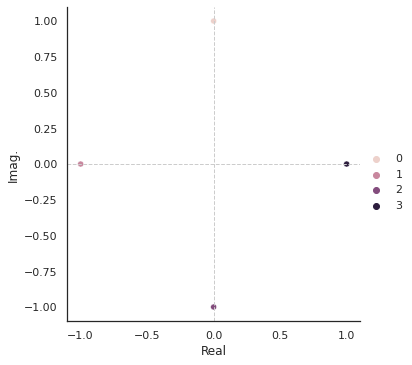

In [23]:
draw_orbit(1j, steps=4)

### Example 6.2

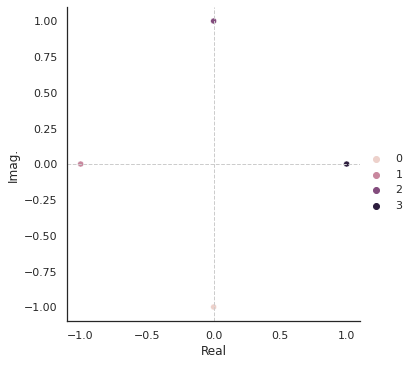

In [24]:
draw_orbit(-1j, steps=4)

Thats much more clear!

With $c=i$ we get a *stable* cycle of values and with $c=-i$ we get a cycle in the opposite direction.

This is the one of the key intuition that explains the usefulness of complex numbers.

$$\begin{aligned}
 1 &\times 1 = 1     \\
-1 &\times -1 = 1   \\
 i &\times i = -1     \\
\end{aligned}$$

What about for smaller imaginary values?

### Example 7.1

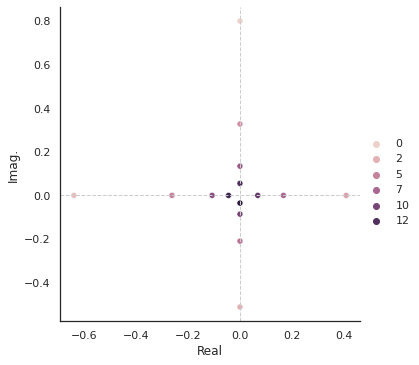

In [25]:
draw_orbit(0.8j, steps=15)

Ooooo! A cool spiral towards zero!

### Example 7.2

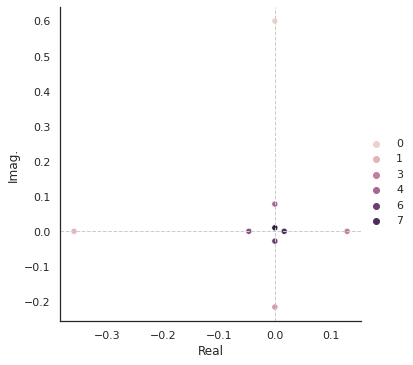

In [16]:
draw_orbit(0.6j, steps=9)

With smaller values its spirals more quickly.

### Example 7.3

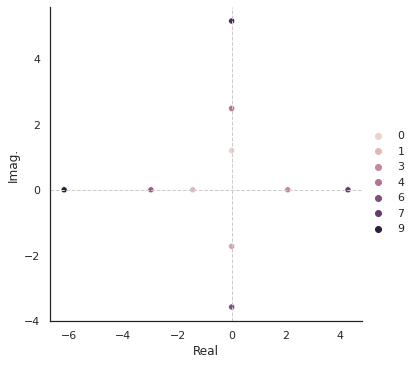

In [11]:
draw_orbit(1.2j)

With larger values, we get a spiral away from zero.

What about mixed complex numbers?

### Example 8.1

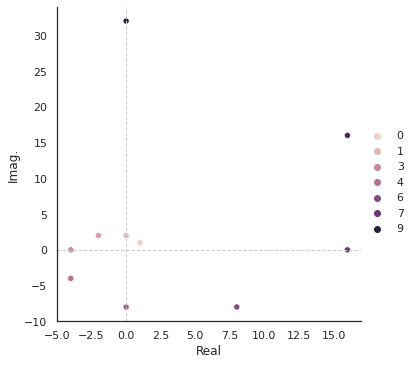

In [28]:
draw_orbit(1+1j, steps=10)

That diverges, but in an anticlockwise spiral.

### Example 8.2

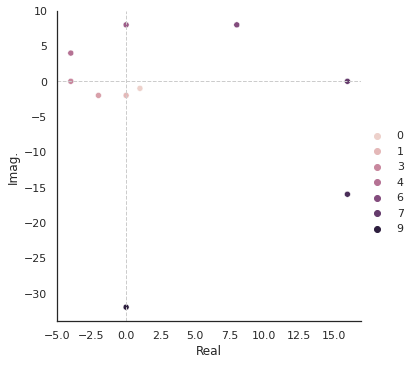

In [29]:
draw_orbit(1+-1j, steps=10)

That diverges, but in an clockwise spiral.

### Example 8.3

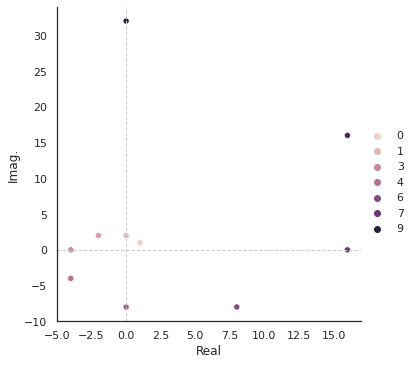

In [30]:
draw_orbit(1 + 1j, steps=10)

### Exmaple 9.1

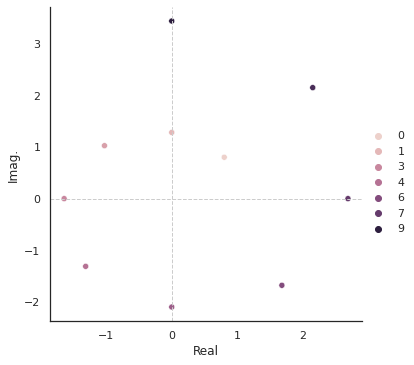

In [12]:
draw_orbit(0.8*(1+1j))

### Example 9.2

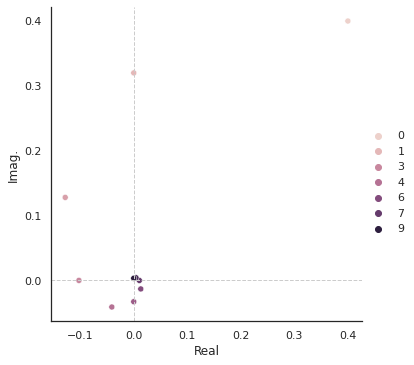

In [32]:
draw_orbit(0.4*(1+1j))

### Example 9.3

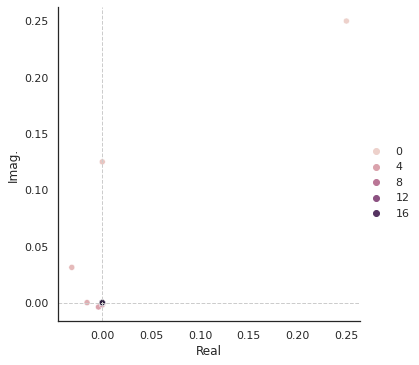

In [33]:
draw_orbit(0.25*(1+1j), steps=20)

### Example 9.4

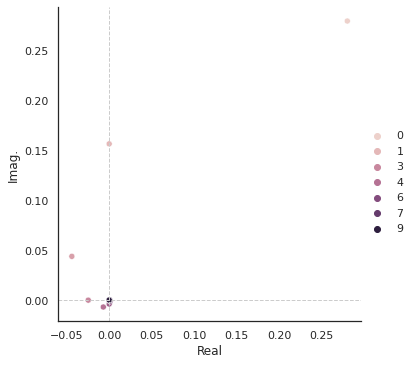

In [13]:
draw_orbit(0.28*(1+1j), steps=10)

### Example 9.5

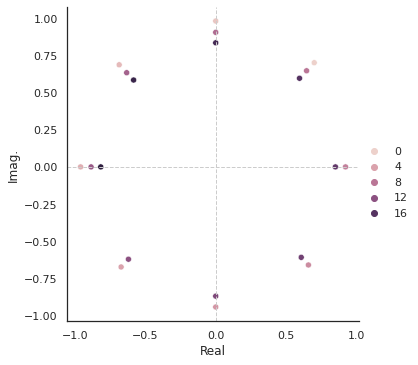

In [35]:
draw_orbit(0.7*(1+1j), steps=20)

### Example 9.6

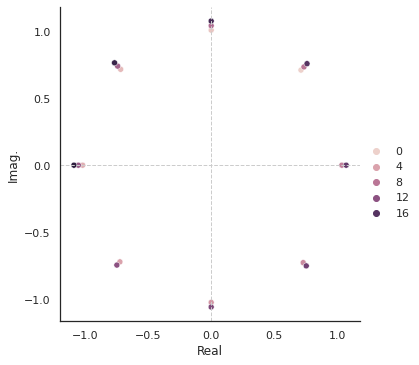

In [36]:
draw_orbit(0.71*(1+1j), steps=20)

### Example 9.7

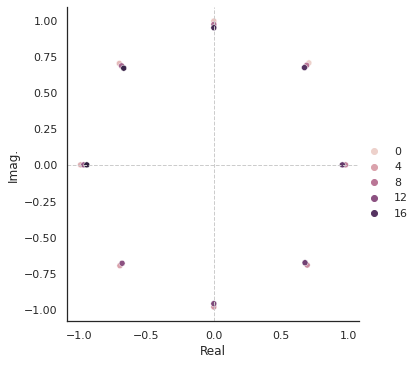

In [37]:
draw_orbit(0.705*(1+1j), steps=20)

So as we approach values of $c$ close to $(1+i) / \sqrt{2}$, we get a cycle. $Z_8$ maybe?

### Example 9.8

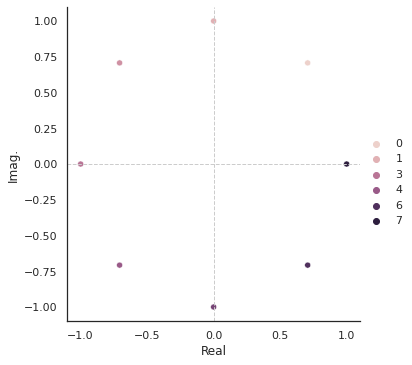

In [39]:
draw_orbit((1+1j)/np.sqrt(2), steps=8)

### Example 9.9

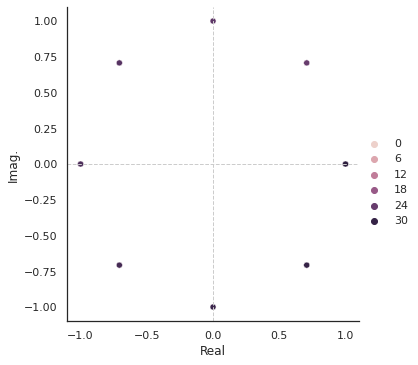

In [18]:
draw_orbit((1+1j)/np.sqrt(2), steps=32)

*"What happens if we nudge outselves just slighty off the circle of radius 1?"*

### Example 10.1

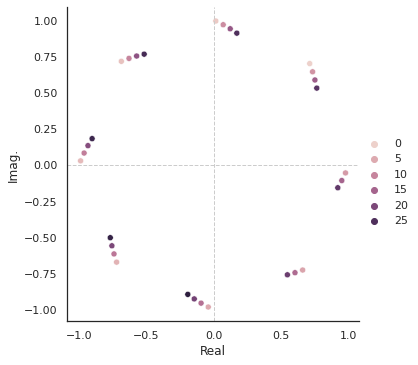

In [20]:
draw_orbit(0.71+.70j, steps=30)

If we nudge the value of $c$ slightly, we get a very tight spiral almost indistinguishable from a circle.

### Example 10.2

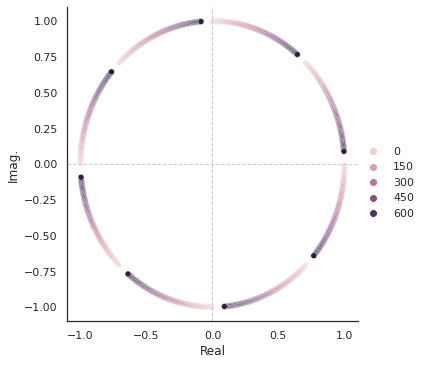

In [40]:
draw_orbit((1.001+0.999j)/np.sqrt(2), steps=700)

### Example 10.3

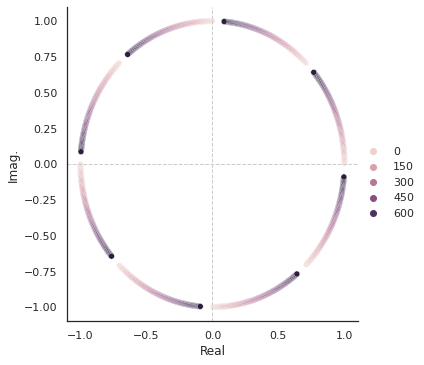

In [23]:
draw_orbit((0.999+1.001j)/np.sqrt(2), steps=700)

With the last 4 examples we have to values for $c$ that are very close to each other, one that diverges and one that converges, and which spiral in opposite directions.

What determines the direction of the spiral? Which ones converge and diverge?

## Example 10.4

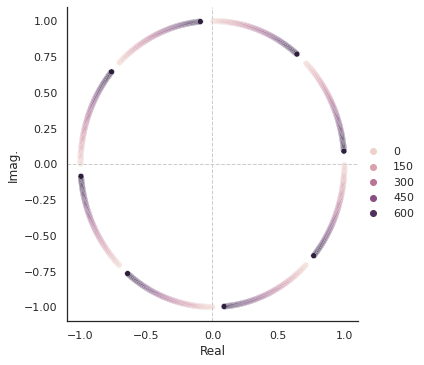

In [25]:
draw_orbit((0.999+-1.001j)/np.sqrt(2), steps=700)

## Example 10.5

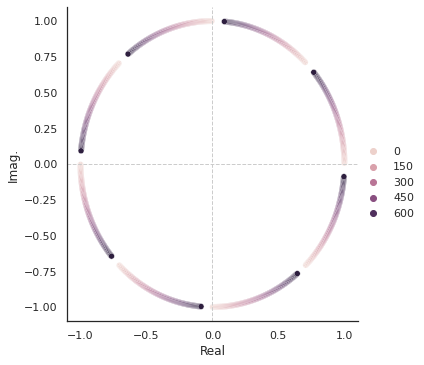

In [27]:
draw_orbit((1.001+-0.999j)/np.sqrt(2), steps=700)

Similar behaviour on the other diagonal.

## Example 11.1

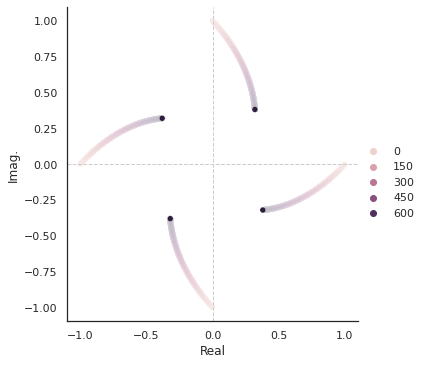

In [37]:
draw_orbit((0.001+0.999j), steps=700)

## Example 11.2

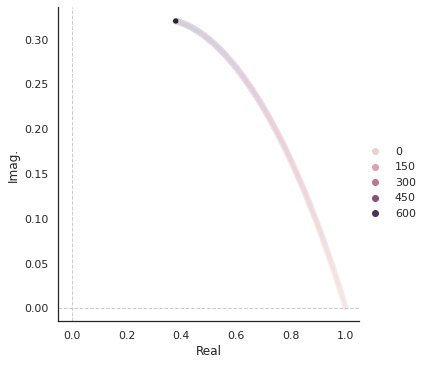

In [39]:
draw_orbit((0.999+0.001j), steps=700)

Things to note:
    
* Some orbits diverge and some converge.
* Different rates of convergence and divergence.
* Some orbits are cyclic or stable.
* Interesting things happen near the boundary.
* Interesting things happen on the diagonals.
* Interesting things happen near the axes.

? Ocsillations, spirals. Direction of the spiral. 

## Exploring the boundary

Orbits that don't diverge are said to be bounded. In the sense that we can imagine drawing a closed curve in the complex plane that contains all of its values.

"For which values of $c$ is the orbit bounded?"

For the orbits investigated above we can make some conjectures which we can try to prove. For example,

> _If $|z_n| > 1$ for any $n$, then the orbit diverges._

But before we start on that, we might want to get a clearer picture of the bounded set.

First, we start with the "escape time algorithm".  **This is back to front**

In [29]:
def escape_time(c:complex, radius:int, max_steps:int=500):
    o = orbit(c)
    index = range(max_steps)
    for i in index:
        z = next(o)
        if abs(z) > radius:
            break
    return i+1

### Example 11.1

In [30]:
escape_time(.707*(1+1j), 10)

500

### Example 11.2

In [43]:
escape_time(4,2)

1

### Example 11.3

In [44]:
escape_time(2,2)

2

In [33]:
def complex_grid(origin:complex=0+0j, width:float=4, resolution:int=50, aspect:float=1):
    """
    Defaults give a 50x50 grid, centered on (0,0), with min_x = -2 and max_x = 2
    """
    height = round(width/aspect)
    
    min_x = origin.real - width/2
    max_x = origin.real + width/2
    min_y = origin.imag - height/2
    max_y = origin.imag + height/2
    
    x = np.linspace(min_x, max_x, resolution)
    y = np.linspace(min_y, max_y, round(resolution/aspect))
    
    A, B = np.meshgrid(x,y)
    G = A + B*1j
    return G

### Example 12.1

In [331]:
complex_grid(resolution=5)

array([[-2.-2.j, -1.-2.j,  0.-2.j,  1.-2.j,  2.-2.j],
       [-2.-1.j, -1.-1.j,  0.-1.j,  1.-1.j,  2.-1.j],
       [-2.+0.j, -1.+0.j,  0.+0.j,  1.+0.j,  2.+0.j],
       [-2.+1.j, -1.+1.j,  0.+1.j,  1.+1.j,  2.+1.j],
       [-2.+2.j, -1.+2.j,  0.+2.j,  1.+2.j,  2.+2.j]])

In [32]:
def draw_grid(G, aspect=1, s=10):
    g = G.flatten()
    # setting `hue` rather than `color` avoids issues with banding
    sns.relplot(x=g.real, y=g.imag, hue=0, s=s, aspect=aspect)

### Example 12.2

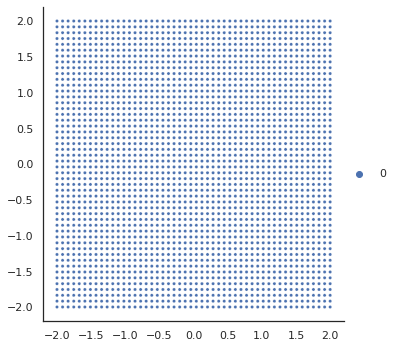

In [34]:
G = complex_grid(width=4, resolution=50) # defaults
draw_grid(G)

The above is to help build confidence in what out code does?

In [334]:
def bounded_set(grid, radius=1, max_steps=5):
    z = []
    for c in grid.flat: # iterate over the whole grid
        num_steps = escape_time(c,radius, max_steps)
        if num_steps >= max_steps:
            z.append(c)
    return z

def draw_bounded_set(bset):
    B = np.array(bset)
    g = sns.relplot(x=B.real, y=B.imag, hue=0, s=10)
    g.set_axis_labels('Real', 'Imag.')
    g.ax.axhline(y=0, linestyle='--', linewidth=1, color='#CCC')
    g.ax.axvline(x=0, linestyle='--', linewidth=1, color='#CCC')

### Example 13.1

In [335]:
G = complex_grid(width=4, resolution=100)
B = bounded_set(grid=G) # this may take some time ...

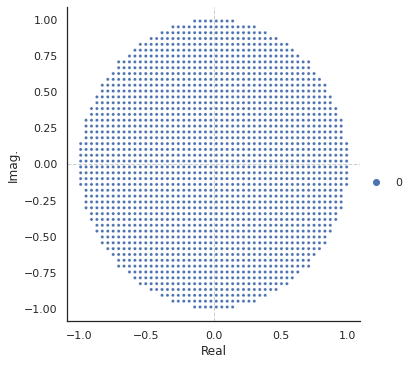

In [292]:
draw_bounded_set(B)

So our earlier intuition, that a circle of radius seems to be the boundry.
But what about those spirals we saws in example???. Could there be some weird values just inside the boundry that spiral out and manage to escape.

In [321]:
def bounded_confidence(grid, radius=2, max_steps=50):
    z = []
    for c in grid.flat: # iterate over the whole grid
        num_steps = escape_time(c,radius, max_steps)
        z.append(num_steps/max_steps)
    return np.array(z,grid.shape)

def draw_bounded_confidence(grid, confidence):
    m = np.array(c_map)
    g = sns.relplot(x=grid.real, y=m.imag, hue=m[:,1].real, s=10)
    g.set_axis_labels('Real', 'Imag.')
    center_x = len(m)
    g.ax.axhline(y=0, linestyle='--', linewidth=1, color='#CCC')
    g.ax.axvline(x=0, linestyle='--', linewidth=1, color='#CCC')

### Example 14.1

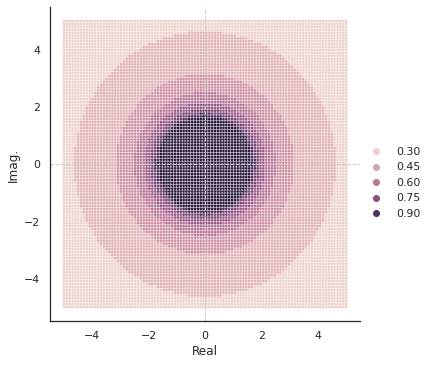

In [324]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=100, max_steps=10)
draw_bounded_confidence(C)

### Example 14.2

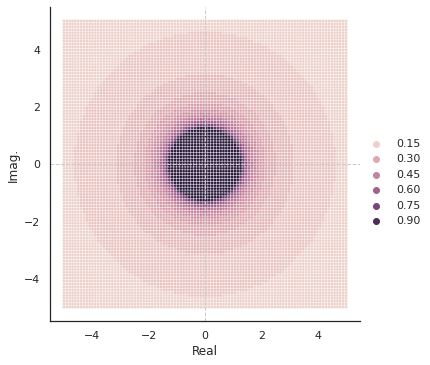

In [325]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=100, max_steps=20)
draw_bounded_confidence(C)

### Example 14.3

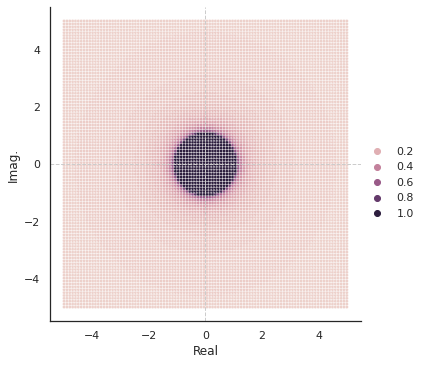

In [326]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=100, max_steps=50)
draw_bounded_confidence(C)c

As we increase the number of steps we take, we get a sharper view of the boundry. However, there is still some "fuzz" around that boundry.

What if we move in the radius?

### Example 15.1

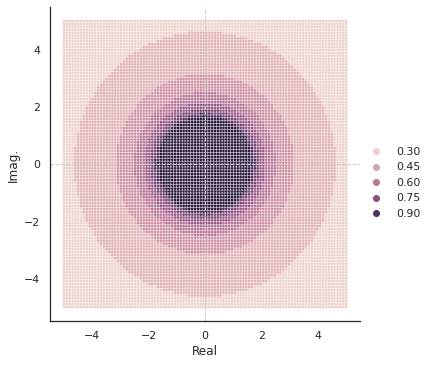

In [337]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=100, max_steps=10)
draw_bounded_confidence(C)

### Example 15.2

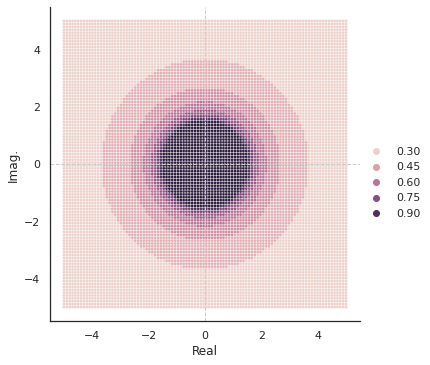

In [341]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=50, max_steps=10)
draw_bounded_confidence(C)

### Example 15.3

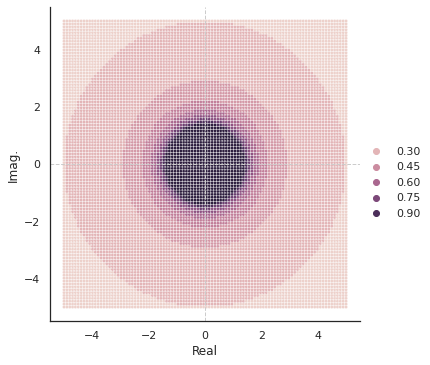

In [343]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=25, max_steps=10)
draw_bounded_confidence(C)

### Example 15.4

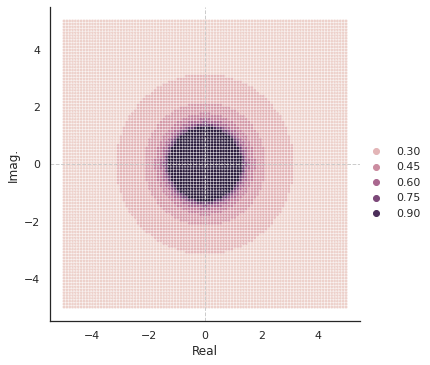

In [344]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=10, max_steps=10)
draw_bounded_confidence(C)

### Example 15.5

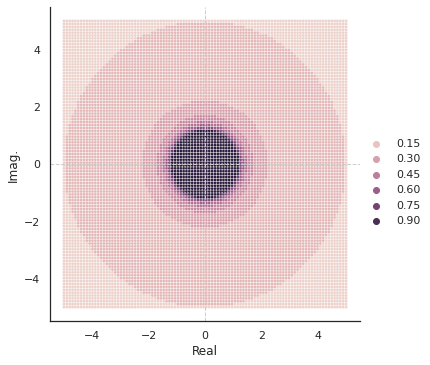

In [345]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=5, max_steps=10)
draw_bounded_confidence(C)

### Example 15.6

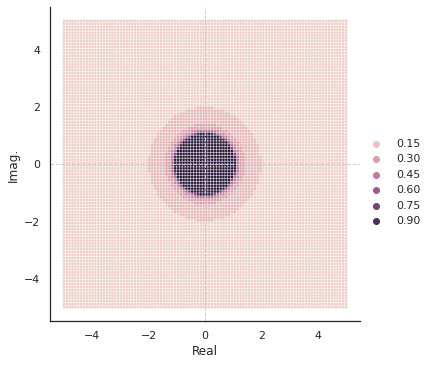

In [346]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=2, max_steps=10)
draw_bounded_confidence(C)

### Example 15.7

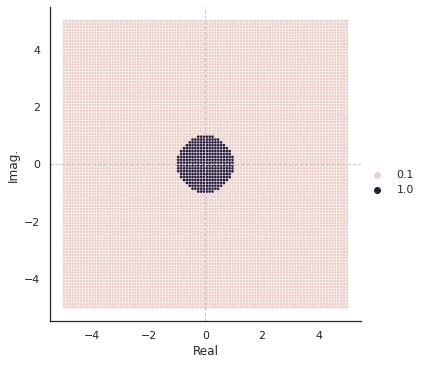

In [352]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=1, max_steps=10)
draw_bounded_confidence(C)

As we reduce our radius, we get at unexpected variation in our confidence estimates. We would normally expect our confidence to increase smoothly as we bring the escape radius in. But that is not happening. 

We probaly just need to run a few more steps to even things out.

### Example 16.1

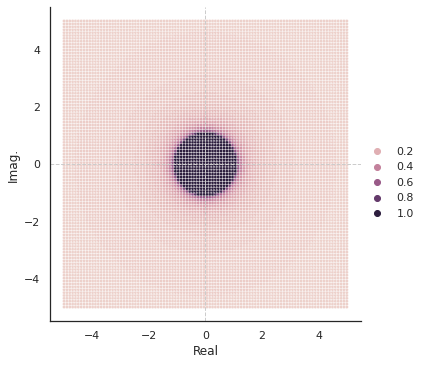

In [359]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=100, max_steps=50)
draw_bounded_confidence(C)

### Example 16.2

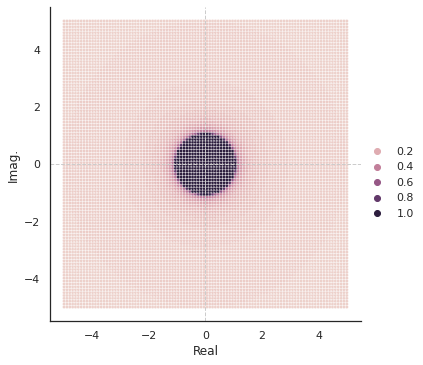

In [358]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=25, max_steps=50)
draw_bounded_confidence(C)

### Example 16.3

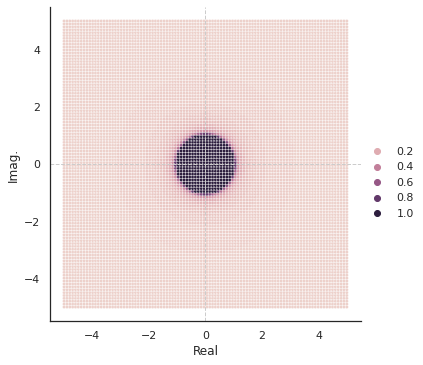

In [360]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=10, max_steps=50)
draw_bounded_confidence(C)

### Example 16.4

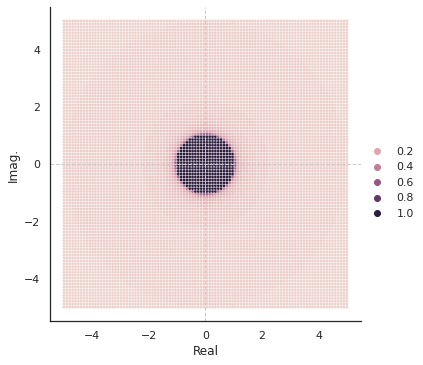

In [361]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=5, max_steps=50)
draw_bounded_confidence(C)

### Example 16.5

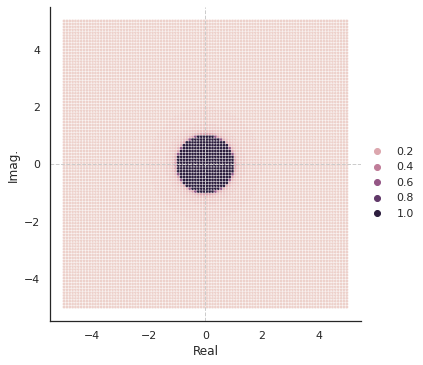

In [362]:
G = complex_grid(width=10, resolution=100)
C = bounded_confidence(G, radius=2, max_steps=50)
draw_bounded_confidence(C)

What if we zoom in on the boundry?

### Example 17.1

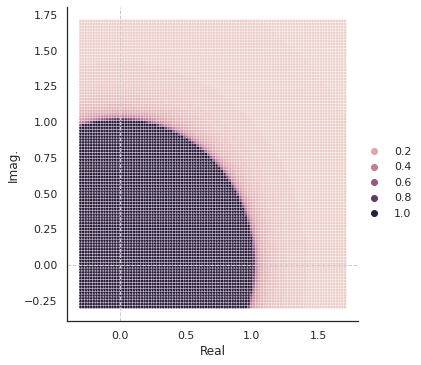

In [368]:
G = complex_grid(origin=0.704*(1+1j), width=2, resolution=100)
C = bounded_confidence(G, radius=2, max_steps=50)
draw_bounded_confidence(C)

### Example 17.2

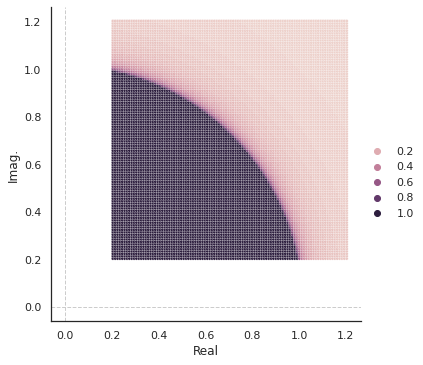

In [366]:
G = complex_grid(origin=0.704*(1+1j), width=1, resolution=100)
C = bounded_confidence(G, radius=2, max_steps=50)
draw_bounded_confidence(C)



## The Mandelbrot orbits

Now that we have some tools and experience, lets look at a slightly more complex, but infinitely more interesting set of orbits, one that is used to generate he ubiquitous Mandelbrot set.


In [ ]:
def orbit2(c:complex): # <- parameter
    z=0               # <- origin
    while True:
        z=z**2+c      # <- recursive expression
        yield z

In [ ]:
Bounding lemma: if \(|z_n| > 2\) for any \(n\), then the orbit is unbounded.

Zoom out to show the circle around \(|z| = 2\)

What about \(|z_n| < 2/3\)?

Zoom in to show:
* repeated patterns
* branches
* weird structures
* less than a pixel width of first image

Links to other articles and YouTube.

Homework: Follow up by using the above to explore Julia sets?
